<a href="https://colab.research.google.com/github/rpdieego/Kaggle_HousePrices/blob/master/Kaggle_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competitions - House Prices: Advanced Regression Techniques

[Click here to check the related page on Kaggle for this challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)



**Step 1 - Defining the Problem**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

**Goal**

Our goal here is to predict the final price of each home based on 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa (USA).

**Performance Metrics**

The score is based on the Root Mean Square Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

*Logarithm is taken in order to errors on the predictions of expensive and cheap houses affect the results equally.*




# Step 2 - Obtaining the Data

The Ames Housing Dataset was compiled by Dean De Cock or use in data science education.

Kaggle already split the dataset in two different groups:

*   Train Dataset (train.csv) - Used to build and train our machine learning model. This set contains the price of the houses, which we are going to use as our target variable;
*   Test Dataset (test.csv) - Used to generate predictions through our model and submit the results into Kaggle;


In [221]:
# import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error

# Opening the Dataframes using Pandas

url_train = 'https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/train.csv'
url_test = 'https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/test.csv'

train_df = pd.read_csv(url_train)
test_df = pd.read_csv(url_test)

# Checking the dimensions of the Datasets

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(train_df.shape[1], train_df.shape[0]))
print("\n")
print("Test Dataset \n Variables:\t{}\n Inputs:\t{}".format(test_df.shape[1], test_df.shape[0]))

Train Dataset 
 Variables:	81
 Inputs:	1460


Test Dataset 
 Variables:	80
 Inputs:	1459


# Section 3 - Exploring the Data

**Data Dictionary**

As we have too many features, and it would take a lot of space in this notebook, the dictionary is available [here](https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/data_description.txt)

In [63]:
#Checking the type of each variable

quantitative = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quantitative.remove('Id')
qualitative = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

print("Quantitative Variables: \t\n{}".format(quantitative))
print("\n")
print("Qualitative Variables: \t\n{}".format(qualitative))

Quantitative Variables: 	
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Qualitative Variables: 	
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fi

**Data Distribution - Quantitative Values**



In [64]:
# Statistical Description of the Data

train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Data Distribution - Qualitative Variables**

In [65]:
# Statistical Description for the Data

train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


**Missing Values**

As we can see in the graph below, 19 of our features have missing values, being that 5 of them have more than 50% empty cells:

*   *PoolQC* - Pool Quality
*   *MiscFeature* - Miscellaneous feature not covered in other categories
*   *Alley* - Type of alley access to property
*   *Fence* - Fence Quality
*   *FireplaceQu* - Fireplace quality


Checking the description of these features on the [data dictionary](https://raw.githubusercontent.com/rpdieego/Kaggle_HousePrices/master/data_description.txt) we can see that a missing value means that the house does not have that feature. Hence it is understandable, and quite predictable, as normally most of house do not have pools or fireplaces for example.




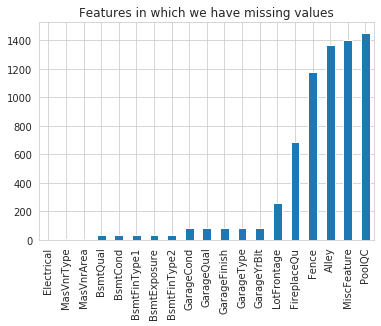

In [66]:
#Counting and Plotting Features in which we have missing values

sns.set_style("whitegrid")
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure();plt.title('Features in which we have missing values')
missing.plot.bar()

**Exploring some of the most important features**

As we have too many features on this dataset, ploting histograms for all of them at once shall not be very helpfull. Then, we are going to take a look first of all in our target variable *SalePrice*

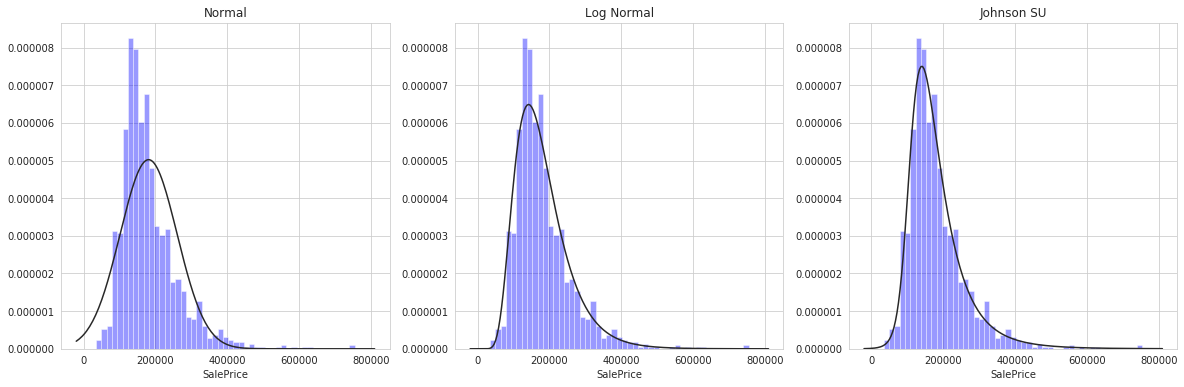

In [67]:
#Fitting distributions to the features SalePrice


fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(20,6))
axis1.title.set_text('Normal')
axis2.title.set_text('Log Normal')
axis3.title.set_text('Johnson SU')

sns.distplot(train_df['SalePrice'], kde=False, color='blue', ax=axis1, fit=stats.norm)
sns.distplot(train_df['SalePrice'] , kde=False, color='blue', ax=axis2, fit=stats.lognorm)
sns.distplot(train_df['SalePrice'], kde=False, color='blue', ax=axis3, fit=stats.johnsonsu)


plt.show()

As we can see, the distribution of the Sale Prices is skewed to the right. This is also a expected behavior for this variable, as few people are able to afford very expensive houses (not only in Ames, but almost everywhere). 
It`s also clear that the prices don't follow a normal distribution, so we need to transform it before running any linear regression.

*   [Linear Regression Assumptions ](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1)


We should also check the normality for the other features:


In [68]:
#Testing the normality of quantitative features

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train_df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


Just as SalePrice, all the other quantitative features are non linear and should be transformed as well during our preprocessing step.

In order to get understand better the dataset, it would be interesting to check the features which have a high correlation with the *SalePrice*

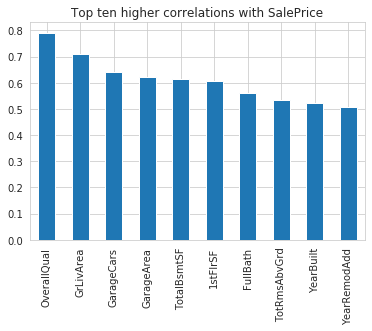

In [69]:
# Correlation Matrix

corr = train_df[quantitative].corr()

#plotting the top 10 correlated features

SalePrice_corr=corr['SalePrice'].sort_values(ascending=False)
plt.figure();plt.title('Top ten higher correlations with SalePrice')
SalePrice_corr[1:11].plot.bar()

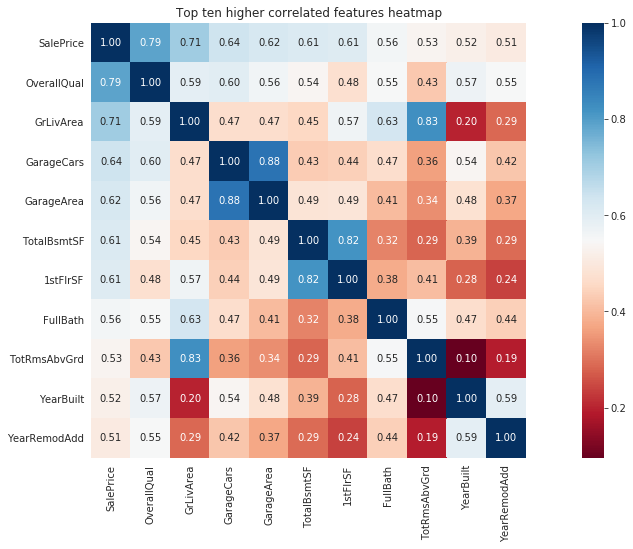

In [70]:
# Heatmap of the Correlation of SalePrice and the top ten correlated features

top_ten_corr_labels=SalePrice_corr[0:11].keys()
top_ten_corr = train_df[top_ten_corr_labels].corr()

plt.figure(figsize=(20,8));plt.title('Top ten higher correlated features heatmap')
sns.heatmap(data=top_ten_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

As shown on the bar graph above, there are some features that are strongly correlated to SalePrice, and the top ten are all above **0.5**:

*   *OverallQual* - Rates the overall material and finish of the house - **correlation:0.79**
*   *GrLivArea* - Above grade (ground) living area square feet - **correlation: 0.71**
*   *GarageCars* - Size of garage in car capacity - **correlation: 0.64**
*   *GarageArea* - Size of garage in square feet - **correlation: 0.62**
*   *TotalBsmtSF* - Total square feet of basement area - **correlation: 0.61**
*   *1stFlrSF* - First Floor square feet - **correlation: 0.61**
*   *FullBath* - Full bathrooms above grade - **correlation: 0.56**
*   TotRmsAbvGrd - Total rooms above grade (does not include bathrooms) - **correlation: 0.53**
*   *YearBuilt* - Original construction date - **correlation: 0.52**
*   *YearRemodAdd* - Remodel date (same as construction date if no remodeling or additions) - **correlation: 0.51**


And the heatmap just below the top ten correlated features to sales price show us the correlations between these features, and it is not difficult to see that multicolinearity is also an issue here, as for example:

*   *GarageArea x GarageCars* - **correlation: 0.88**
*   *TotRmsAbvGrd x GrLivArea* - **correlation: 0.83**
*   *1stFlrSF x TotalBsmtSF* - **correlation: 0.82**
*   *FullBath x GrLivArea* - **correlation: 0.63**
*   *YearRemodAdd x YearBuilt* - **correlation: 0.59**




I`m not surprised at all with the two variables which have the hightest correlations with Sale Price: *Overarall Quality* and *Above Grade Living Area*, as normally people value quality and the bigger the house the higher the price.







**Investigating possible outliers**

An easy way to visualy investigate outliers would be taking a look at the scatter plots of the five features which are correlated the most with SalePrice:

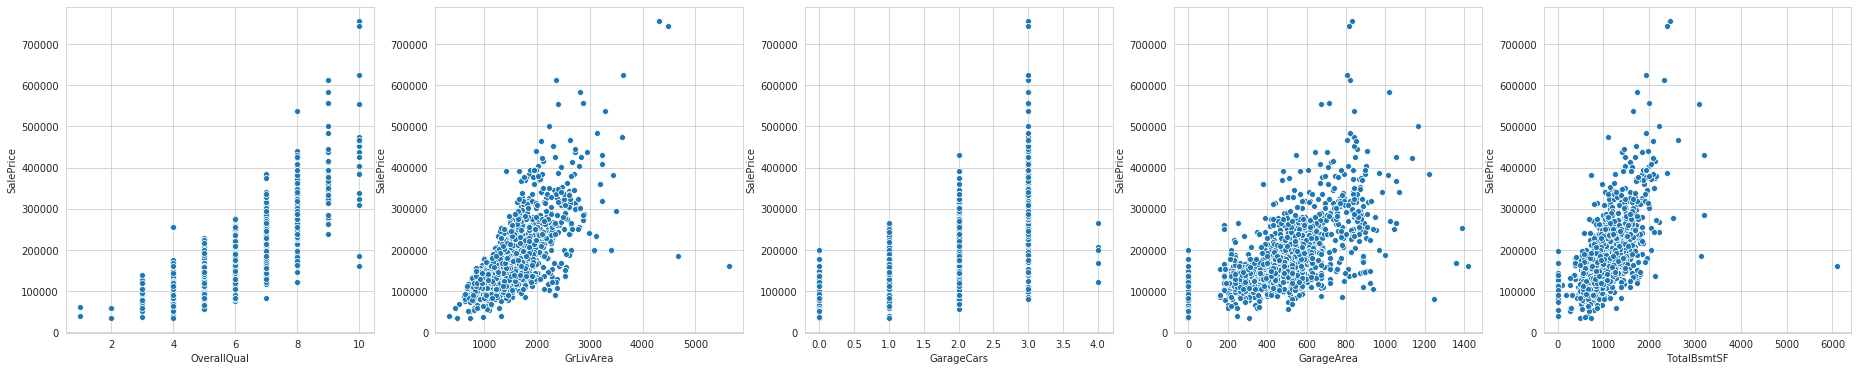

In [71]:
# Scatterplots
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(1,5, figsize=(32,6))
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_df, ax=axis1)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df, ax=axis2)
sns.scatterplot(x='GarageCars',y='SalePrice',data=train_df, ax=axis3)
sns.scatterplot(x='GarageArea',y='SalePrice',data=train_df, ax=axis4)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train_df, ax=axis5)

First of all, it`s possible to see that the target variables has an unequal level of variance across most independent predictor variable values. This is also an issue in this data set, as Homoscedasticity is one of the linear regression assumptions. We will also need to deal with this on our preprocessing step.

*   [Linear Regression Assumptions ](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1)

As we could already seen on the distribution graph of SalePrice, there are two house with really high prices (Above 700.000,00 USD)

Besides that, by looking at the scatter plots, one can see that no outliers seems to be shown on the *OverallQual* and *GarageCars* graphs. In the other hand, there are some poins that call our attention in the other three:

*   The two houses with high above grade living area and low price;
*   The four houses with high Garage Area and low price;
*   The one house with high basement and low price; 

In [72]:
# Indexes of the Potential SalePrice Outliers
SalePrice_Outlier_Idx = train_df.query('SalePrice > 700000').index.tolist()
SalePrice_Outlier_Idx

[691, 1182]

In [73]:
# Indexes of the Potential GrLivArea Graph Outliers
GrLivArea_Outlier_Idx = train_df.query('SalePrice < 200000 & GrLivArea > 4000').index.tolist()
GrLivArea_Outlier_Idx

[523, 1298]

In [74]:
# Indexes of the Potential GarageArea Graph Outliers
GarageArea_Outlier_Idx = train_df.query('SalePrice < 300000 & GarageArea > 1200').index.tolist()
GarageArea_Outlier_Idx

[581, 1061, 1190, 1298]

In [75]:
# Indexes of the Potential TotalBsmtSF Graph Outliers
TotalBsmtSF_Outlier_Idx = train_df.query('SalePrice < 200000 & TotalBsmtSF > 6000').index.tolist()
TotalBsmtSF_Outlier_Idx

[1298]

In [76]:
# Potential Outliers Index List

Potential_Outliers_Idx = SalePrice_Outlier_Idx + GrLivArea_Outlier_Idx + GarageArea_Outlier_Idx + TotalBsmtSF_Outlier_Idx
Potential_Outliers_Idx=list(set(Potential_Outliers_Idx))
Potential_Outliers_Idx.sort()
Potential_Outliers_Idx

[523, 581, 691, 1061, 1182, 1190, 1298]

In [77]:
# Top ten characteristics for our list of potential outliers

train_df.loc[Potential_Outliers_Idx,top_ten_corr_labels]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
523,184750,10,4676,3,884,3138,3138,3,11,2007,2008
581,253293,8,2042,3,1390,2042,2042,2,8,2008,2009
691,755000,10,4316,3,832,2444,2444,3,10,1994,1995
1061,81000,3,894,3,1248,894,894,1,6,1935,1950
1182,745000,10,4476,3,813,2396,2411,3,10,1996,1996
1190,168000,4,1622,4,1356,1249,1622,1,7,1961,1975
1298,160000,10,5642,2,1418,6110,4692,2,12,2008,2008


*   Houses with really high prices ( > 700.000,00 USD) - **Indexes 691 and 1182**

      By looking at the features of these two houses, it`s possible to conclude that the high price is undestandable, as their Overall Quality is at the highest, their living area above ground is quite huge, both houses are new, and also both figure well in all of the most correlated features with price.
      Hence, these two **shall not be considered outliers**.


*   The two houses with high above grade living area and low price - **Indexes 523 and 1298**

     In the other hand, these price of these two houses don`t seem to follow any logic if our judgment is based only in these features. As the two houses with the highest prices, these two have also the best ratio in Overall Quality, they are new and are well place in all the other desirable characteristics.

     *Hypothesis* - Is there another factor which could drop the prices this much? It worth investigating a little bit more these two cases, because they are strong candidates to outliers.


*   The four houses with high Garage Area and low price - **Indexes 581, 1061, 1190, 1298**

     Besides the house **#1298**, it`s understandable the lower price for these houses, as they are quite smaller and the Overall Quality is way above the other houses we have analyzed.
     Hence, 581, 1061 and 1190 **shall not be considered outlier**s as well.

*   The one house with high basement and low price; - **Index 1298**

      Once again our friend **#1298** showed up.



In summary, only the houses **#523** and **#1298** seem to be outliers, and we will get rid of them during our preprocessing step.




# Section 4 - Preprocessing Data

**Saving a copy of our datasets before any work on them**

It`s important to create a "checkpoint" for our work by creating a copy of our datasets before doing any processing on the data.

In [0]:
# Creating a copy of the datasets
preprocessing_train_df = train_df.copy()
preprocessing_test_df = test_df.copy()

# Saving datasets indexes
train_idx = train_df.shape[0]
test_idx = test_df.shape[0]

#Saving HouseID for Kaggle submission template
houseId = test_df['Id']

**Dropping the Id variables and outliers**

In [0]:
# Drop Id
preprocessing_train_df.drop(['Id'], axis=1, inplace=True)
preprocessing_test_df.drop(['Id'], axis=1, inplace=True)

# Drop the two outliers houses (#523 and #1298)
preprocessing_train_df = preprocessing_train_df[preprocessing_train_df.GrLivArea < 4500]
preprocessing_train_df.reset_index(drop=True, inplace=True)

**Transforming the target variable**

As we have seen during Section 3, our target variables does not follow a normal distribution, which is one of the assumptions to perform a linear regression. Hence, a tranformation is necessary it in order to make sure this variable follows a normal distribution.

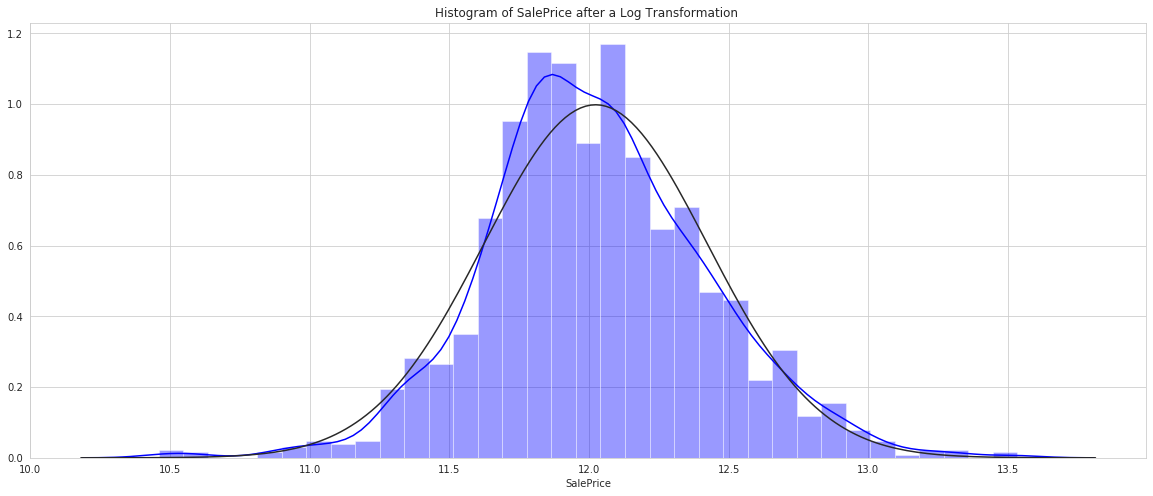

In [80]:
#Transforming target variable SalePrice
preprocessing_train_df['SalePrice'] = np.log1p(preprocessing_train_df['SalePrice'])

plt.figure(figsize=(20,8));plt.title('Histogram of SalePrice after a Log Transformation ')
sns.distplot(preprocessing_train_df['SalePrice'], color='blue', fit=stats.norm, norm_hist=True)
plt.show()

By applying a log transformation into our target variable, one can see that the right skewness is gone, and now it fits way better a normal distribution.

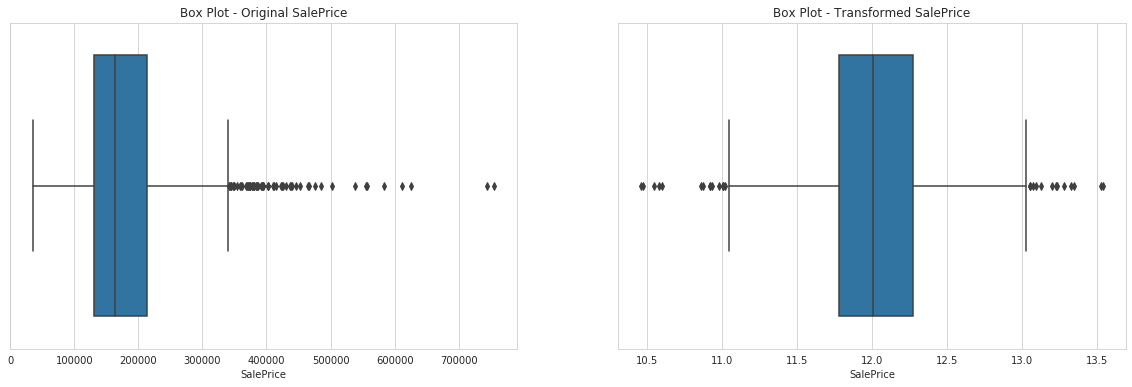

In [81]:
# Box Plots - pre-transformed and post-transformed SalePrice
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(20,6))
axis1.title.set_text('Box Plot - Original SalePrice')
axis2.title.set_text('Box Plot - Transformed SalePrice')

sns.boxplot(train_df['SalePrice'], ax=axis1)
sns.boxplot(preprocessing_train_df['SalePrice'], ax=axis2,)

The log transformation have removed the normality of error, which solves one of the other issues for the linear regression assumptions: *Homoscedasticity.*

Ideally, when all the assumptions for the linear regression are met, the residual plot will look like a random and unstructure cloud of points centered arround the zero line.

It becomes clearer by taking a look at these residual plots:

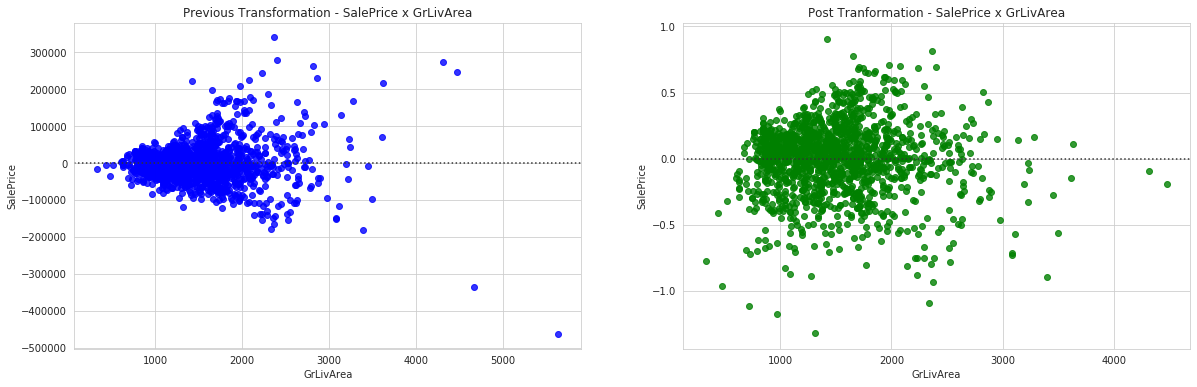

In [82]:
# GrLivArea Scatter Plot
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(20,6))
axis1.title.set_text('Previous Transformation - SalePrice x GrLivArea')
axis2.title.set_text('Post Tranformation - SalePrice x GrLivArea')

sns.residplot(x = train_df['GrLivArea'], y = train_df['SalePrice'],ax=axis1, color='blue')
sns.residplot(x = preprocessing_train_df['GrLivArea'], y = preprocessing_train_df['SalePrice'],ax=axis2, color='green')

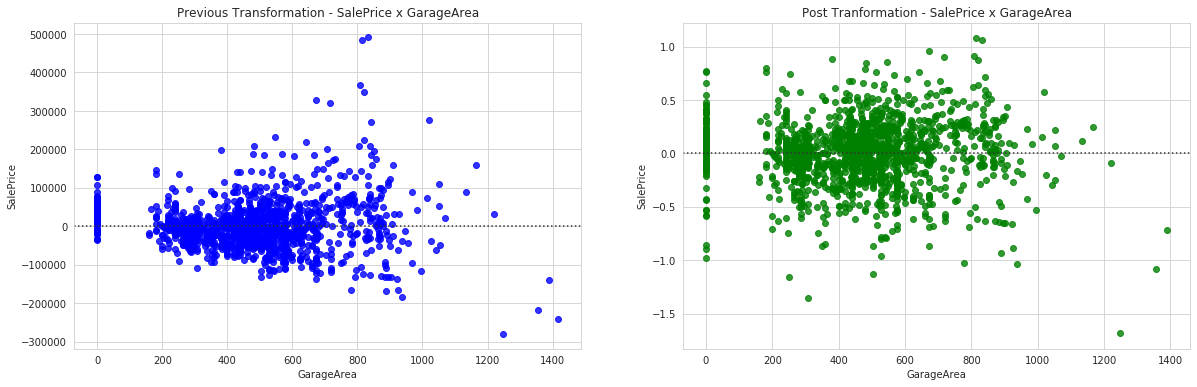

In [83]:
# Garage Area Scatter Plot
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(20,6))
axis1.title.set_text('Previous Transformation - SalePrice x GarageArea')
axis2.title.set_text('Post Tranformation - SalePrice x GarageArea')

sns.residplot(x = train_df['GarageArea'], y = train_df['SalePrice'],ax=axis1, color='blue')
sns.residplot(x = preprocessing_train_df['GarageArea'], y = preprocessing_train_df['SalePrice'],ax=axis2, color='green')

**Merging Train and Test Datasets**

We are going to merge both train and test data sets into a single one called Merged_df in order to perform all the pre processing steps at once in all the data. As soon as this step is done, these two datasets will be once again splitted.


In [0]:
# Removing 'SalePrice' column from train dataset before merging all the data
target = preprocessing_train_df.SalePrice.copy()
preprocessing_train_df.drop(['SalePrice'], axis=1, inplace=True)

# Merging both datasets into a single one

Merged_df = pd.concat(objs=[preprocessing_train_df, preprocessing_test_df], axis=0).reset_index(drop=True)

In [85]:
# Creating another checkpoint

preprocessing_Merged_df = Merged_df.copy()

# Checking the dimensions of the Dataset

print("Merged Dataset \n Variables:\t{}\n Inputs:\t{}".format(Merged_df.shape[1], Merged_df.shape[0]))

Merged Dataset 
 Variables:	79
 Inputs:	2917


**Missing Values**

As we have added our test dataset into our working data, one needs to check once again which variables have missing values in order to fix it

In [86]:
# Table of Missing Values for the Merged Dataframe

Total_Missing=Merged_df.isnull().sum().sort_values(ascending = False)[Merged_df.isnull().sum().sort_values(ascending = False) != 0]
Percent_Missing=round(Merged_df.isnull().sum().sort_values(ascending = False)/len(Merged_df)*100,2)[round(Merged_df.isnull().sum().sort_values(ascending = False)/len(Merged_df)*100,2) != 0]
Merged_Missing = pd.concat([Total_Missing,Percent_Missing], axis=1, keys=['Total','%'])
Merged_Missing

,Total,%
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


As we have already mentioned in the Section 3, there are some features whith intentional blank spaces, meaning that the house do not have that feature. Example given is the feature whith more missing values: *PoolQC*, where the blank space means that the house has no pool.

*   *Features in which values were intentionally let blank*:

  *   *PoolQC* - Pool quality
  *   *MiscFeature* - Miscellaneous feature not covered in other categories
  *   *Alley* - Type of alley access to property
  *   *Fence* - Fence quality
  *   *FireplaceQu* - Fireplace quality
  *   *GarageCond* - Garage condition
  *   *GarageQual* - Garage quality
  *   *GarageFinish* - Interior finish of the garage
  *   *GarageType* - Garage location
  *   *BsmtCond* - Evaluates the general condition of the basement
  *   *BsmtExposure* - Refers to walkout or garden level walls
  *   *BsmtQual* - Evaluates the height of the basement
  *   *BsmtFinType2* - Rating of basement finished area (if multiple types)
  *   *BsmtFinType1* - Rating of basement finished area
  *   *BsmtFinSF1* - Type 1 finished square feet
  *   *BsmtFinSF2* - Type 2 finished square feet

For these features, we shall only reaplce the missing value with *'None'*




In [0]:
# Replacing blank spaces with 'None'
none_replace = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","BsmtExposure","BsmtQual","BsmtFinType2","BsmtFinType1","BsmtFinSF1","BsmtFinSF2"]

for i in none_replace:
  preprocessing_Merged_df[i] = preprocessing_Merged_df[i].fillna('None')

There are also quantitative features with blank spaces. We are going to assume that if the value is missing, it means that the house don`t have that feature, and replace the blank value for zero. These features describe the area of a determined caractheristic or count something related to theses caractheristics, so it should be ok to consider missing values as zero.

*   *Quantitative features which have missing values*

  *   *GarageYrBlt* - Year garage was built
  *   *MasVnrArea* - Masonry veneer area in square feet
  *   *BsmtHalfBath* - Basement half bathrooms
  *   *BsmtFullBath* - Basement full bathrooms
  *   *BsmtUnfSF* - Unfinished square feet of basement area
  *   *TotalBsmtSF* - Total square feet of basement area
  *   *GarageArea* - Size of garage in square feet
  *   *GarageCars* - Size of garage in car capacity

In [0]:
# Replacing blank spaces with '0'
zero_replace = ["GarageYrBlt","MasVnrArea","BsmtHalfBath","BsmtFullBath","BsmtUnfSF","TotalBsmtSF","GarageArea","GarageCars"]

for i in zero_replace:
  preprocessing_Merged_df[i] = preprocessing_Merged_df[i].fillna(0)

For some of the qualitative features which have missing values, we are going to replace the empty spaces with the most common value for that feature, in other words, the mode.

*   *Qualitative features whichi will be replaced by the mode*

  *   *MasVnrType* - Masonry veneer type
  *   *Utilities* - Type of utilities available
  *   *Exterior2nd* - Exterior covering on house (if more than one material)
  *   *Exterior1st* - Exterior covering on house
  *   *SaleType* - Type of sale



Some qualitative features already have a general / typical category as an options. For thoses which have it, we are going to replace the blank spaces with this category.

*   *Qualitative features whichi will be replaced by the general / typical category*
  *   *Functional* - Home functionality (Assume typical unless deductions are warranted)
  *   *Electrical* - Electrical system
  *   *KitchenQual* - Kitchen quality


In [0]:
 # Replacing blank spaces with the mode

preprocessing_Merged_df['MasVnrType'] = preprocessing_Merged_df['MasVnrType'].fillna(preprocessing_Merged_df['MasVnrType'].mode()[0])
preprocessing_Merged_df['Utilities'] = preprocessing_Merged_df['Utilities'].fillna(preprocessing_Merged_df['Utilities'].mode()[0])
preprocessing_Merged_df['Exterior2nd'] = preprocessing_Merged_df['Exterior2nd'].fillna(preprocessing_Merged_df['Exterior2nd'].mode()[0])
preprocessing_Merged_df['Exterior1st'] = preprocessing_Merged_df['Exterior1st'].fillna(preprocessing_Merged_df['Exterior1st'].mode()[0])
preprocessing_Merged_df['SaleType'] = preprocessing_Merged_df['SaleType'].fillna(preprocessing_Merged_df['SaleType'].mode()[0])

# Replacing blank spaces with general / typical categories

preprocessing_Merged_df['Functional'] = preprocessing_Merged_df['Functional'].fillna("Typ")
preprocessing_Merged_df['Electrical'] = preprocessing_Merged_df['Electrical'].fillna("SBrkr")
preprocessing_Merged_df['KitchenQual'] = preprocessing_Merged_df['KitchenQual'].fillna("TA")


Now, we have only two more features in which there are some blank spaces:

*   *LotFrontage* - Linear feet of street connected to property

  *   We can use the average linear feet / street connected to property per neighborhood in Ames to fill the blank spaces;

*   *MSZoning* - Identifies the general zoning classification of the sale

  *   Also here, the most common classification per neighborhood seems to be a good alternative;

*   *GarageYrBlt* - Year garage was built

  *   Also here, the most common classification per neighborhood seems to be a good alternative;

In [0]:
# Replacing LotFrontage missing values
preprocessing_Merged_df['LotFrontage'] = preprocessing_Merged_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

# Replacing MSZoning missing values
preprocessing_Merged_df['MSZoning'] = preprocessing_Merged_df.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

Now, our DataFrame should have no missing values:

In [91]:
# Table of Missing Values for the Merged Dataframe

Total_Missing=preprocessing_Merged_df.isnull().sum().sort_values(ascending = False)[preprocessing_Merged_df.isnull().sum().sort_values(ascending = False) != 0]
Percent_Missing=round(preprocessing_Merged_df.isnull().sum().sort_values(ascending = False)/len(preprocessing_Merged_df)*100,2)[round(preprocessing_Merged_df.isnull().sum().sort_values(ascending = False)/len(preprocessing_Merged_df)*100,2) != 0]
Merged_Missing = pd.concat([Total_Missing,Percent_Missing], axis=1, keys=['Total','%'])
Merged_Missing

,Total,%


**Features Skewness**

In order to get rid completely of the Heteroscedasticity we have seen during Section 3, and avoid model bias, we are likely to check on the skewness of our numeric features and apply a Box Cox transformation to the ones which have absolute Skewness values bigger than 0,5:

[ Normality Testing - GoodData Documentation ](https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis)

In [0]:
# Removing Sale Price from the list of features to be analyzed, as we already done some work on it
quantitative.remove('SalePrice')

In [0]:
# Getting the skewness of the quantitative features
skewness_features = preprocessing_Merged_df[quantitative].skew().sort_values()

In [94]:
# Features with absolute Skweness > 0.5
skewed_features = skewness_features[abs(skewness_features) > 0.5]
skewed_features = skewed_features.index

#Box Cox Transformation
for i in skewed_features:
  preprocessing_Merged_df[i] = boxcox1p(preprocessing_Merged_df[i], boxcox_normmax(preprocessing_Merged_df[i]+1))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


**Feature Engineering**

This dataset has several features for the same house charactheristics. Hence, it make sense to check if it`s possible to combine some of these variables into a single one, in order to avoid the multicolinearities we have seen on the heatmap during section 3.

I`ve created an excel file splitting the features into groups and deciding how to deal with the categorical features. Plese find the file [here](https://github.com/rpdieego/Kaggle_HousePrices/blob/master/Features_Groups.xlsx).

I decided to create the following features:

*   *TotalHouseArea* - Total Built Area of the house in square feet (sum of all the living areas minus the low quality and unfinished living areas)
  *   *TotalHouseArea = 1stFlrSF + 2ndFlrSF + GrLivArea + TotalBsmtSF -LowQualFinSF - BsmtUnfSF*

*   *TotalBathrooms* - Total number of bathrooms in the house
  *   *TotalBathrooms = BsmtFullBath + 0.5 * BsmtHalfBath + FullBath + 0.5 * HalfBath*

*   *TotalPorchArea* - Total porch area in square feet
  *   *TotalPorchArea = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch*

*   *SwimmingPool* - Informs if the house has a pool or not
  *   *SwimmingPool = If PoolArea > 0, = 1 ; If PoolArea = 0, =0*

*   *YearBuiltPlusRemold* - Original Construction Date + Remodel Date (Same as construction if there were no remodeling or addictions)
  *   *YearBuiltPlusRemold = YearBuilt + YearRemodAdd*

*   *Basement* - Informs if the house has a basement or not
  *   *Basement = If TotalBsmtSF > 0, = 1 ; If TotalBsmtSF = 0, =0*

In [95]:
# Checking the dimensions of the Dataframe

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessing_Merged_df.shape[1], preprocessing_Merged_df.shape[0]))

Train Dataset 
 Variables:	79
 Inputs:	2917


In [0]:
# Total House Area
preprocessing_Merged_df['TotalHouseArea'] =  (preprocessing_Merged_df['1stFlrSF'] + preprocessing_Merged_df['2ndFlrSF'] + preprocessing_Merged_df['GrLivArea'] +
                                              preprocessing_Merged_df['TotalBsmtSF'] - preprocessing_Merged_df['LowQualFinSF'] - preprocessing_Merged_df['BsmtUnfSF'])

In [0]:
# Total Bathrooms
preprocessing_Merged_df['TotalBathrooms'] = (preprocessing_Merged_df['BsmtFullBath'] + (0.5 * preprocessing_Merged_df['BsmtHalfBath']) + preprocessing_Merged_df['FullBath'] + ( 0.5 * preprocessing_Merged_df['HalfBath']))

In [0]:
# Total Porch Area
preprocessing_Merged_df['TotalPorchArea'] =  (preprocessing_Merged_df['OpenPorchSF'] + preprocessing_Merged_df['EnclosedPorch'] + preprocessing_Merged_df['3SsnPorch'] + preprocessing_Merged_df['ScreenPorch'])

In [0]:
# Swimming Pool

preprocessing_Merged_df['SwimmingPool'] = preprocessing_Merged_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [0]:
# Year Built Plus Remold
min_max_scaler = preprocessing.MinMaxScaler()

scaled_YearBuilt = preprocessing_Merged_df[['YearBuilt']].values.astype(float)
scaled_YearRemodAdd = preprocessing_Merged_df[['YearRemodAdd']].values.astype(float)

scaled_YearBuilt = min_max_scaler.fit_transform(scaled_YearBuilt)
scaled_YearRemodAdd = min_max_scaler.fit_transform(scaled_YearRemodAdd)

preprocessing_Merged_df['YearBuiltPlusRemold'] = (scaled_YearBuilt + scaled_YearRemodAdd)

In [0]:
# Basement

preprocessing_Merged_df['Basement'] = preprocessing_Merged_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [102]:
# Checking the dimensions of the Dataframe

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessing_Merged_df.shape[1], preprocessing_Merged_df.shape[0]))

Train Dataset 
 Variables:	85
 Inputs:	2917


In [0]:
# Dropping the features we used to build our new features

preprocessing_Merged_df = preprocessing_Merged_df.drop(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtUnfSF',
                                                        'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                                        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch',
                                                        'PoolArea','PoolQC','YearBuilt','YearRemodAdd',
                                                        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2'], axis=1)

We could see also that *GarageCars* and *GarageArea* were bringing multicolinearity to our model, so I`m going to proceed only with *GarageCars*, which should give enough information about the garage size by itself.

In [0]:
# Dropping GarageArea
preprocessing_Merged_df = preprocessing_Merged_df.drop(['GarageArea'], axis=1)

There are also some other features that should bring no valuable information to our prediction, so I`m also dropping them:



In [0]:
# Dropping MoSold
preprocessing_Merged_df = preprocessing_Merged_df.drop(['MoSold','Street'], axis=1)

In [106]:
# Checking the dimensions of the Dataframe

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessing_Merged_df.shape[1], preprocessing_Merged_df.shape[0]))

Train Dataset 
 Variables:	57
 Inputs:	2917


**Creating Dummy Variables**

As we have several categorical features, it`s necessary to create dummy variables in order to have a numeric value to work during our training process:

obs: *N-1* dummie variables per feature, where N is the number of possible categories of that specific feature

In [0]:
# Creating another checkpoint
dummies_preprocessing_Merged_df = preprocessing_Merged_df.copy()

In [0]:
# Creating Dummy Variables

dummies_preprocessing_Merged_df = pd.get_dummies(preprocessing_Merged_df, drop_first=True).reset_index(drop=True)

In [109]:
dummies_preprocessing_Merged_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,MiscVal,YrSold,TotalHouseArea,TotalBathrooms,TotalPorchArea,SwimmingPool,YearBuiltPlusRemold,Basement,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.499673,18.780786,13.833054,7,3.991517,19.433175,3,0.750957,2.261968,0.000000,8.323081e+56,2.0,0.000000,0.000000,2008,1432.442010,3.527858,12.080309,0,1.803585,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,4.249693,21.443061,14.117918,6,6.000033,0.000000,3,0.750957,1.996577,0.903334,6.554016e+56,2.0,56.184223,0.000000,2007,563.962447,2.355448,0.000000,0,1.082288,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,6.499673,19.331294,14.476512,7,3.991517,17.768840,3,0.750957,1.996577,0.903334,8.177961e+56,2.0,0.000000,0.000000,2008,1448.106640,3.527858,9.901081,0,1.764887,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,6.862541,17.840337,14.106196,7,3.991517,0.000000,3,0.750957,2.137369,0.903334,7.964750e+56,3.0,0.000000,0.000000,2006,1232.909497,1.993440,24.986827,0,0.540357,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6.499673,22.118472,15.022008,8,3.991517,25.404164,4,0.750957,2.373753,0.903334,8.106300e+56,3.0,42.245702,0.000000,2008,1771.998952,3.527858,14.271568,0,1.720661,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,9.030084,8.936631,10.765922,4,5.348041,0.000000,3,0.750957,1.834659,0.000000,0.000000e+00,0.0,0.000000,0.000000,2006,879.458478,1.534418,0.000000,0,0.929132,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2913,9.030084,8.936631,10.723223,4,3.991517,0.000000,3,0.750957,1.996577,0.000000,6.212317e+56,1.0,0.000000,0.000000,2006,899.631883,1.534418,7.267260,0,0.929132,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2914,4.249693,33.173873,15.820339,5,5.348041,0.000000,4,0.750957,2.137369,0.903334,5.679882e+56,2.0,75.771208,0.000000,2006,592.322966,1.993440,0.000000,0,1.279075,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2915,7.337375,18.220108,14.307159,5,3.991517,0.000000,3,0.750957,1.996577,0.000000,0.000000e+00,0.0,23.762297,6.937474,2006,393.053371,1.355448,8.534938,0,1.503053,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0

As we can see, GarageYearBlt values are way to high, due to the box cox transformation, so I need to normalize them:

In [0]:
# Normalizing GarageYearBlt Values
scaled_GarageYearBlt = dummies_preprocessing_Merged_df[['GarageYrBlt']].values.astype(float)
scaled_GarageYearBlt = min_max_scaler.fit_transform(scaled_GarageYearBlt)
dummies_preprocessing_Merged_df['GarageYrBlt'] = scaled_GarageYearBlt

In [111]:
dummies_preprocessing_Merged_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,MiscVal,YrSold,TotalHouseArea,TotalBathrooms,TotalPorchArea,SwimmingPool,YearBuiltPlusRemold,Basement,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.499673,18.780786,13.833054,7,3.991517,19.433175,3,0.750957,2.261968,0.000000,0.181277,2.0,0.000000,0.000000,2008,1432.442010,3.527858,12.080309,0,1.803585,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,4.249693,21.443061,14.117918,6,6.000033,0.000000,3,0.750957,1.996577,0.903334,0.142747,2.0,56.184223,0.000000,2007,563.962447,2.355448,0.000000,0,1.082288,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,6.499673,19.331294,14.476512,7,3.991517,17.768840,3,0.750957,1.996577,0.903334,0.178116,2.0,0.000000,0.000000,2008,1448.106640,3.527858,9.901081,0,1.764887,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,6.862541,17.840337,14.106196,7,3.991517,0.000000,3,0.750957,2.137369,0.903334,0.173473,3.0,0.000000,0.000000,2006,1232.909497,1.993440,24.986827,0,0.540357,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6.499673,22.118472,15.022008,8,3.991517,25.404164,4,0.750957,2.373753,0.903334,0.176556,3.0,42.245702,0.000000,2008,1771.998952,3.527858,14.271568,0,1.720661,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,9.030084,8.936631,10.765922,4,5.348041,0.000000,3,0.750957,1.834659,0.000000,0.000000,0.0,0.000000,0.000000,2006,879.458478,1.534418,0.000000,0,0.929132,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2913,9.030084,8.936631,10.723223,4,3.991517,0.000000,3,0.750957,1.996577,0.000000,0.135305,1.0,0.000000,0.000000,2006,899.631883,1.534418,7.267260,0,0.929132,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2914,4.249693,33.173873,15.820339,5,5.348041,0.000000,4,0.750957,2.137369,0.903334,0.123708,2.0,75.771208,0.000000,2006,592.322966,1.993440,0.000000,0,1.279075,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2915,7.337375,18.220108,14.307159,5,3.991517,0.000000,3,0.750957,1.996577,0.000000,0.000000,0.0,23.762297,6.937474,2006,393.053371,1.355448,8.534938,0,1.503053,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0

Now that everything looks better, we shall split the traning and testing sets once again:

In [0]:
# Splitting the datasets using the indexes we saved

preprocessed_train_df = dummies_preprocessing_Merged_df.iloc[:(train_idx-2)]
preprocessed_test_df = dummies_preprocessing_Merged_df.iloc[(train_idx-2):]

In [113]:
# Checking the dimensions of the Datasets

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessed_train_df.shape[1], preprocessed_train_df.shape[0]))
print("\n")
print("Test Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessed_test_df.shape[1], preprocessed_test_df.shape[0]))

Train Dataset 
 Variables:	215
 Inputs:	1458


Test Dataset 
 Variables:	215
 Inputs:	1459


# Section 5 - Modeling


In this section, I'm going to try a regression techniques called Ridge Regression, in order to predict the sale price of a house based on it`s features.

I'm also going to check the key for statistics of that model:

*   *SSE - Sum of squared error*
*   *SST - Total sum of squared error*
*   *R² - R squared (goodness of fit measure)*
*   *R²adj - Adjusted R squared (goodness of fit measure for multivariable regressions)*





In [0]:
# Class to capture the four key statistics about the model predictions

class Stats:
    
    def __init__(self, X, y, y_hat):
        self.data = X
        self.target = y
        self.predicted = y_hat
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        #returns sum of squared errors (model vs actual)
        squared_errors = (self.target - self.predicted) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        #returns total sum of squared errors (actual vs avg(actual))
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        #returns calculated value of r^2
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        #returns calculated value of adjusted r^2
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [0]:
# Report for the four key statistics abou the model predictions

def report_stats(stats_obj):
    #returns report of statistics for the model predicted values
    print("Key Four Statistics for this Model \n")
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [0]:
#Splitting our train test into two: train e test sets

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_train_df, target, test_size=0.1)

**Ridge Regression**

In [0]:
# Creating an array for alpha
import decimal
def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)

alpha_ridge = list(drange(0, 100, '0.1'))

# Create variables to store SSE and MSE for all the alpha values
alpha_ridge_rss = {}
alpha_ridge_mse = {}

# Regressions for all the values of alpha
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value
    y_hat_ridge = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_hat_ridge)
    rss = sum((y_hat_ridge-y_test)**2)
    alpha_ridge_mse[i] = mse
    alpha_ridge_rss[i] = rss

In [177]:
# Finding out the best alpha for our model
min_mse_ridge = min(alpha_ridge_mse.items(), key=lambda x: x[1])
min_rss_ridge = min(alpha_ridge_rss.items(), key=lambda x: x[1])

print("Alpha with the minimum MSE , minimun MSE:\t {}\n".format(min_mse_ridge))
print("Alpha with the minimum RSS , minimun RSS:\t {}\n".format(min_rss_ridge))

Alpha with the minimum MSE , minimun MSE:	 (0.1, 0.020887041009271995)

Alpha with the minimum RSS , minimun RSS:	 (0.1, 3.049507987353712)



We can see here that *alpha = 0.1* is the best option for our regression model.

In [0]:
# Running again the rigde regression only with the best alpha value
best_alpha_ridge = 0.1
ridge = Ridge(alpha= best_alpha_ridge, normalize=True)
ridge.fit(X_train, y_train)
y_hat_ridge = ridge.predict(X_test)

# Four Key Statistics for the Multiple Linear Regression
stats_linear_ridge = Stats(X_test,y_test,y_hat_ridge)
report_stats(stats_linear_ridge)

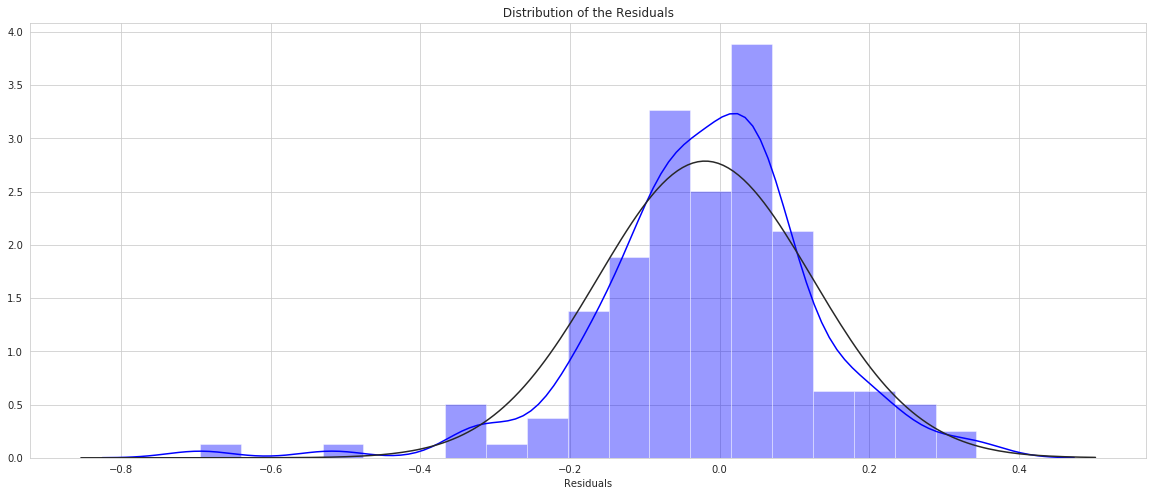

In [218]:
# Residuals
ridge_residuals = y_test - y_hat_ridge

plt.figure(figsize=(20,8));plt.title(' Distribution of the Residuals ')
sns.distplot(ridge_residuals, color='blue', fit=stats.norm, norm_hist=True, axlabel='Residuals')
plt.show()

In [224]:
#Root mean squared error
rmse_ridge = np.sqrt(mean_squared_log_error( y_test, y_hat_ridge ))

print("Root-Mean-Squared-Error (RMSE):\t {}\n".format(rmsle_ridge))

Root-Mean-Squared-Error (RMSE):	 0.01141689785303241



Root-Mean Squared Error is the evaluation metric Kaggle is going to use on our predictions. 

The *RMSE* on our train dataset is: **0.01141689785303241**

Let`s submit our predictions to the train datated on Kaggle, and compare the RMSE from training and testing to evaluate our model.

# Section 6 - Evaluating the Results

As the testing dataset Kaggle provided us doesn`t include the feature 'SalePrice', the validation is going to be madle directly by Kaggle when we submit our results in the desirable format:

In [0]:
# Generating prediction with the test dataset

y_predicted = ridge.predict(preprocessed_test_df)

submission_df = pd.DataFrame ({"Id": houseId,"SalePrice": y_predicted})

# Generating the .csv file for submission

submission_df.to_csv('./submission_houseprices.csv', index=False)

By submiting our predition into the Kaggle website, we had the the following result:

![](https://github.com/rpdieego/Kaggle_HousePrices/blob/master/HousePrices_Result.JPG?raw=true)

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

*   Train RSME = **0.01142**
*   Test RSME = **9.45402**



**What does it mean?**

Good results on the training set and poor results on the testing set shows that our model is overfitted to the training data.

Our model shows a huge variance on the test set predictions, and it would be necessary to try another regression technicques or different approaches to the feature engineering in order to improve our results.

[Bias and Variance explained](https://www.youtube.com/watch?v=EuBBz3bI-aA&ab_channel=StatQuestwithJoshStarmer)